# Compare coastline products

- Cartopy default - Natural-earth: https://www.naturalearthdata.com/
- GSHHS: https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html
- LINZ: https://data.linz.govt.nz/layer/105085-nz-coastline-mean-high-water/
 

In [1]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.shapereader as sReader 
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
#load the GSHSS coastline
coastline_GSHSS = cfeature.GSHHSFeature(scale='full')  #scale = ‘auto’, ‘coarse’, ‘low’, ‘intermediate’, ‘high', or ‘full’

In [3]:
#load the LINZ coastline
shp = sReader.Reader('nz-coastline-mean-high-water/nz-coastline-mean-high-water.shp')

In [4]:
def plot_coastlines(window=[174, 176, -36, -38], clon=180, leg_loc='lower right', xlocs=None):
    
    fig, ax = plt.subplots(1,1, figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree(clon)})
    ax.set_extent(window)

    leg_handles = []

    ax.coastlines('10m', color='red')
    leg_handles += [mlines.Line2D([], [], color='red', label='Natural Earth')]
    
    ax.add_feature(coastline_GSHSS, edgecolor='k',facecolor='none', lw=2)
    leg_handles += [mlines.Line2D([], [], color='k', lw=2, label='GSHSS')]

    ax.add_geometries(shp.geometries(), ccrs.PlateCarree(), edgecolor='g', facecolor='none')
    leg_handles += [mlines.Line2D([], [], color='g', label='LINZ coastline mean-high water')]

    ax.legend(handles=leg_handles, loc=leg_loc)
    gl = ax.gridlines(draw_labels=True, xlocs=xlocs)

    return fig,ax

#, xlocs=np.arange(160,190,5))

/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://www.ngdc.noaa.gov/mgg/shorelines/data/gshhs/latest/gshhg-shp-2.3.7.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


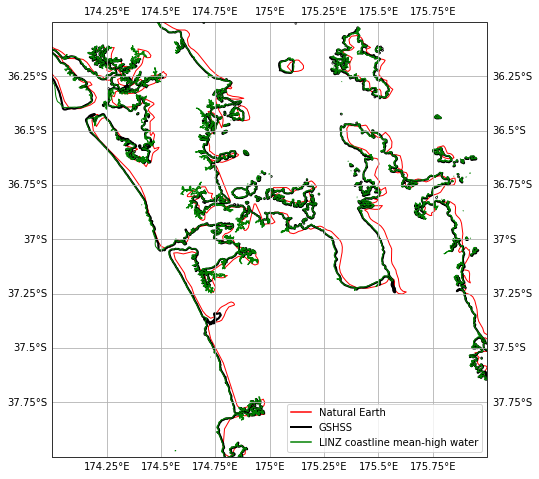

In [5]:
# Auckland 
fig,ax = plot_coastlines(window=[174, 176, -36, -38], leg_loc='lower right')

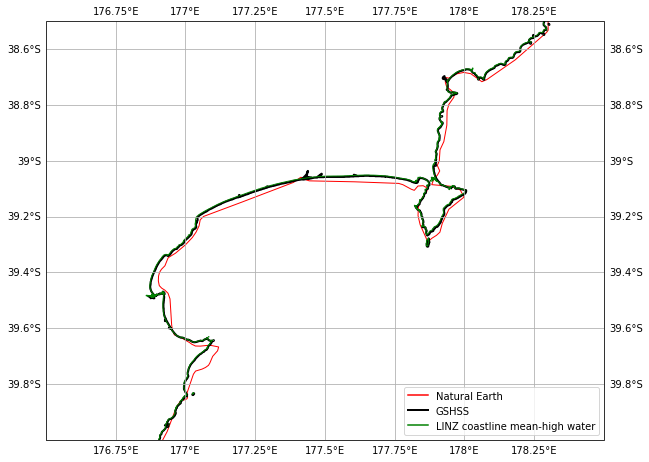

In [7]:
# Mahia
# -39.11726928022768, 177.91082075591424
fig,ax = plot_coastlines(window=[176.5, 178.5, -40, -38.5], leg_loc='lower right')

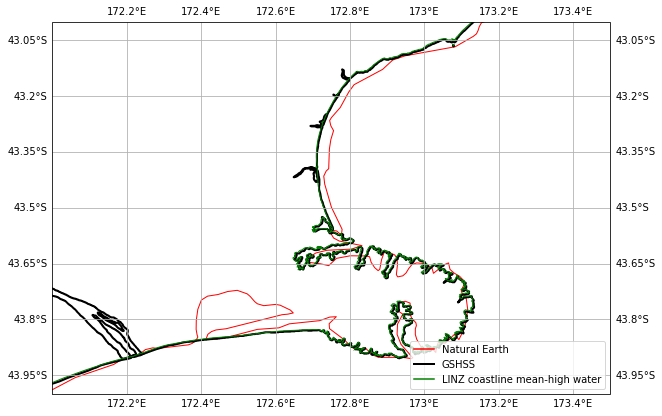

In [8]:
# Lytleton
# -43.70587714765569, 172.80434947762365
fig,ax = plot_coastlines(window=[172, 173.5, -44, -43], leg_loc='lower right')

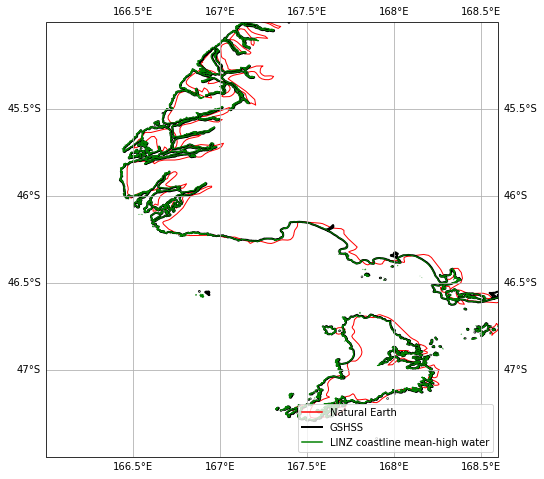

In [9]:
# Stewart Island
# -46.96370832533591, 167.9080919560567
fig,ax = plot_coastlines(window=[166, 168.6, -47.5, -45], leg_loc='lower right')
# fig.savefig('plt_coastline_sounds.png')

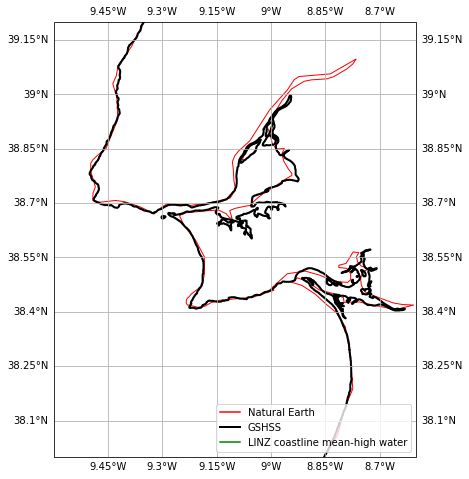

In [10]:
# Lisbon
fig,ax = plot_coastlines(window=[-9.6, -8.6, 38, 39.2], clon=0, leg_loc='lower right')

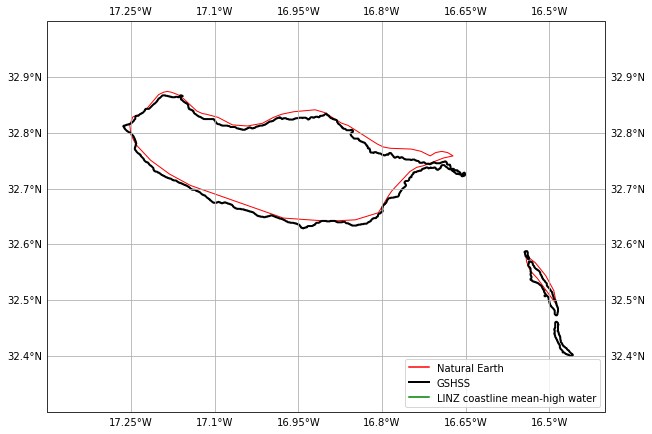

In [11]:
# Madeira
# 32.667983144110366, -16.940636395663027
fig,ax = plot_coastlines(window=[-17.4, -16.4, 32.3, 33], clon=0, leg_loc='lower right')
# fig.savefig('plt_coastline_madeira.png')

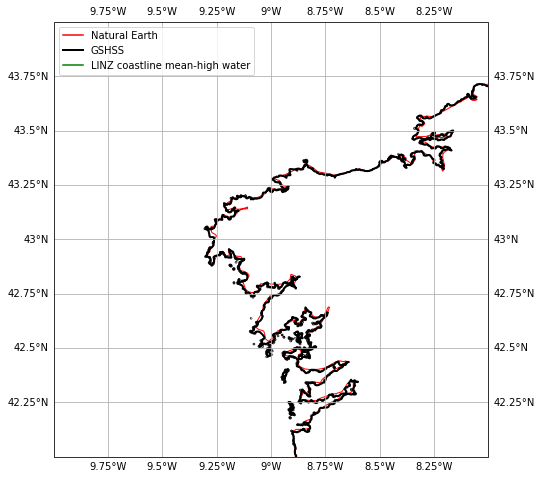

In [12]:
# Galicia
# 42.8799296625815, -8.596274659638597
fig,ax = plot_coastlines(window=[-10, -8, 42, 44], clon=0, leg_loc='upper left')

Text(5.3, 60.5, 'Bergen')

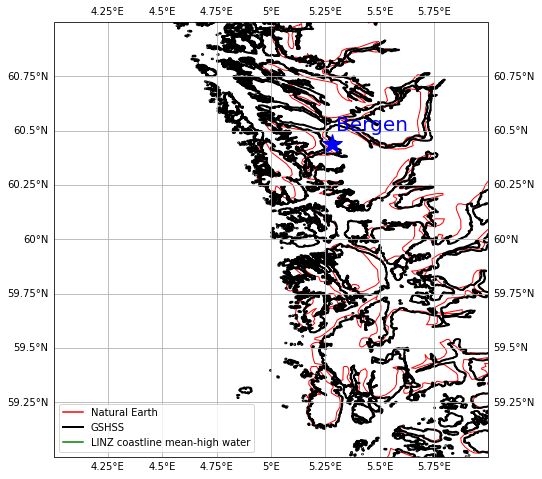

In [13]:
# Norway Bergen
# 60.43858127037093, 5.279957533657037
fig,ax = plot_coastlines(window=[4, 6, 59, 61], clon=0, leg_loc='lower left')
ax.plot(5.279957533657037,60.43858127037093, 'b*', ms=20)
ax.text(x=5.3,y=60.5, s='Bergen', color='blue', fontsize=20)
# fig.savefig('plt_coastline_norway.png')